In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('dirty_iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Sepal.Width'].value_counts()

Sepal.Width
 3.0     23
 3.2     12
 2.8     12
 3.1     11
 3.4     10
 2.9      9
 2.7      8
 2.5      7
 3.5      6
 3.3      6
 2.6      5
 3.8      5
 2.3      3
 2.2      3
 3.6      3
 3.7      2
 29.0     1
 4.0      1
 4.2      1
-3.0      1
 3.9      1
 4.1      1
 30.0     1
 0.0      1
Name: count, dtype: int64

In [11]:
# [i] Number and percentage of complete obeservations

df_completeobs = df.dropna()

total_obs = len(df) 
notna_obs = len(df_completeobs)
perc_notna_obs = notna_obs/total_obs*100 #BODMAS WORKS 

print('Total Observations: ', total_obs)
print('Complete Observations: ', notna_obs)
print('Percentage of Complete Observations: ', perc_notna_obs,' %', sep='')

Total Observations:  150
Complete Observations:  96
Percentage of Complete Observations: 64.0 %


In [42]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [13]:
# [ii] Replace all special values with NA

cols_to_check = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

df[df[cols_to_check] == 'inf'] = pd.NA

ERRORS
numerical properties cannot be zero              4
sepal length must not be > 30                    2
sepal length must be longer than petal length    2
sepal length must be atleast 2x petal width      2
Name: count, dtype: int64


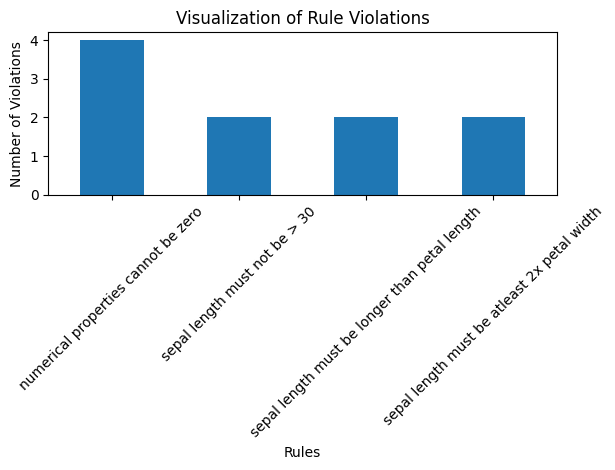

In [14]:
#Importing Ruleset
from ruleset_for_dmp2 import DirtyIrisRuleset as E

# [iv] Applying Rulset and visualizing results
df['ERRORS'] = df.apply(E, axis=1)

# data summarization 
vio = df[df['ERRORS'].apply(lambda x: len(x) > 0)]
df = df.drop(columns='ERRORS')

# Flatten the list of errors and count occurrences
error_counts = vio['ERRORS'].explode().value_counts()
print(error_counts)

# Plotting
error_counts.plot(kind='bar')
plt.title('Visualization of Rule Violations')
plt.xlabel('Rules')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


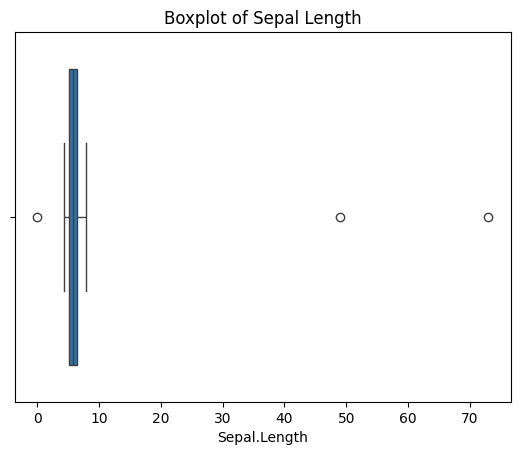

Detected Outliers:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
27           73.0         29.0          63.0          NaN  virginica
42            0.0          NaN           1.3          0.4     setosa
124          49.0         30.0          14.0          2.0     setosa


In [15]:
# [v] Outliers in sepal lenth using boxplot.stats

# plotting boxplot
plt.figure()
sns.boxplot(x=df['Sepal.Length'])
plt.title('Boxplot of Sepal Length')
plt.show()

# indentifying outliers using interquartile ranges
Q1 = df['Sepal.Length'].quantile(0.25)
Q3 = df['Sepal.Length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# detecting and printing outliers
outliers = df[(df['Sepal.Length'] < lower_bound) | (df['Sepal.Length'] > upper_bound)]
print("Detected Outliers:")
print(outliers)